# Python 3: 구조화상품과 수치해석
1. [몬테카를로 시뮬레이션](#mc)
1. [유한차분법](#fdm)

<a id="mc"></a>
## 몬테카를로 시뮬레이션 (Monte Carlo Simulation)
1. [원주율 계산](#mc1)
1. [주가경로 생성](#mc2)
1. [주가경로 반복 생성](#mc3)
1. [1-asset ELS](#mc4)
1. [2-asset 주가 경로 생성](#mc5)
1. [2-asset ELS](#mc6)

<a id="mc1"></a>
### 원주율 계산
[Back to Section Top](#mc)<br>
정사각형 안에 내접하는 원형 표적으로 다트를 던져 원주율을 계산

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def compute_pi(N=100):
    count=0

    x = np.zeros([N, 1]); y = np.zeros([N, 1])
    z = np.zeros([N, 1]); r = np.zeros([N, 1])
    x = 2 * np.random.random((N, 1)) - 1
    y = 2 * np.random.random((N, 1)) - 1
    z = np.power(x, 2) + np.power(y, 2)
    r = np.sqrt(z)

    for i in range(N):
        if r[i]<1:
            count = count + 1
            plt.plot(x[i], y[i], 'k*', markersize=5)
        else:
            plt.plot(x[i], y[i], 'k*', markersize=5)

    t = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(t), np.sin(t), 'k', linewidth=2)
    plt.axis('image'); plt.show()

    Pi = 4 * count / N
    print('Pi=%f'%Pi)

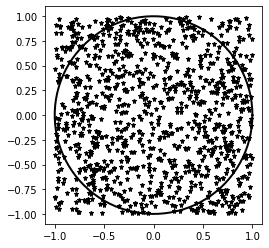

Pi=3.096000


In [2]:
compute_pi(N=1000)

<a id="mc2"></a>
### 주가경로 생성
[Back to Section Top](#mc)<br>
무위험 이자율이 1.65%, 변동성은 7.9%, 현재시점의 주가가 100인 경우 주가 경로를 시뮬레이션 하라

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def stock_process(N=180, S0=100, vol=0.079, r=0.0165, T=1):
    S = np.zeros([N, 1]); S[0] = S0
    dt = T / N
    t = np.linspace(0, T, N)
    z = np.random.normal(0, 1, N)
    for i in range(N - 1):
        S[i + 1, 0] = S[i, 0] * np.exp((r - 0.5 * vol ** 2) * dt + vol * z[i] * np.sqrt(dt))

    plt.plot(t, S[:, 0], 'ko-')
    plt.xlabel('Time')
    plt.ylabel('Stock Process')
    plt.show()

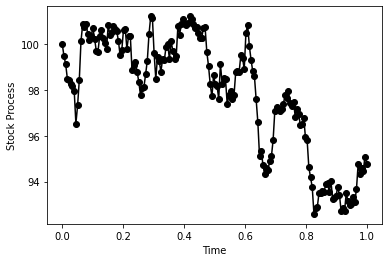

In [5]:
stock_process(N=180, S0=100, vol=0.079, r=0.0165, T=1)

<a id="mc3"></a>
### 주가경로 반복 생성
[Back to Section Top](#mc)<br>
무위험 이자율이 2.1%, 변동성은 7.9%, 현재시점의 주가가 100인 경우 주가 경로를 50회 시뮬레이션 하라

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def stock_process_n(N=365, S0=100, vol=0.079, r=0.021, T=1, iteration=50):
    S = np.zeros([N,1]); S[0] = S0
    dt = T / N
    t = np.linspace(0, T, N)
    plt.xlabel('Time')
    plt.ylabel('Stock Process')
    for k in range(0, iteration):
        z = np.random.normal(0, 1, N)
        for i in range(N - 1):
            S[i + 1, 0] = S[i, 0] * np.exp((r - 0.5 * vol ** 2) * dt + vol * z[i] * np.sqrt(dt))
        plt.plot(t[:], S[:], 'k-', linewidth=0.3)
    plt.show()

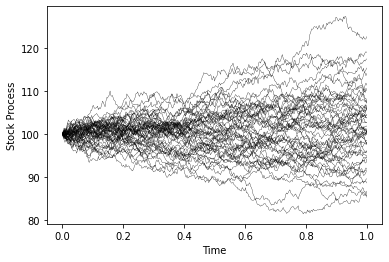

In [6]:
stock_process_n(N=365, S0=100, vol=0.079, r=0.021, T=1, iteration=50)

<a id="mc4"></a>
### 1-asset ELS
[Back to Section Top](#mc)<br>
무위험 이자율이 1.65%, 변동성은 17.78%, 현재시점의 주가가 100인 경우 95-95-95-90-90-85 연4.4% 1-asset ELS를 시뮬레이션 하라

|조기 행사 만기|조기 행사가|쿠폰 이자율|상환금액|
|:------------:|:--------:|:---------:|:-----:|
|2022년 5월 27일|최초기준가격의 95%|2.2%|액면금액 x 102.2%|
|2022년 11월 27일|최초기준가격의 95%|4.4%|액면금액 x 104.4%|
|2023년 5월 27일|최초기준가격의 95%|2.2%|액면금액 x 106.6%|
|2023년 11월 27일|최초기준가격의 90%|4.4%|액면금액 x 108.8%|
|2024년 5월 27일|최초기준가격의 90%|2.2%|액면금액 x 111%|
|2024년 11월 27일|최초기준가격의 85%|4.4%|액면금액 x 113.2%|

In [7]:
#ELS_MC_1D
import numpy as np
from datetime import date

n=10000; r=0.0165; vol=0.1778
n0 = date.toordinal(date(2022, 5, 27))
n1 = date.toordinal(date(2022, 11, 27))
n2 = date.toordinal(date(2023, 5, 27))
n3 = date.toordinal(date(2023, 11, 27))
n4 = date.toordinal(date(2024, 5, 27))
n5 = date.toordinal(date(2024, 11, 27))
n6 = date.toordinal(date(2025, 5, 27))
check_day = np.array([n1-n0, n2-n0, n3-n0, n3-n0, n5-n0, n6-n0])
oneyear = 365; tot_date = n6 - n0
dt = 1 / oneyear
S = np.zeros([tot_date + 1, 1])
S[0] = 100.0
strike_price = np.array([0.95, 0.95, 0.95, 0.90, 0.90, 0.85]) * S[0]
repay_n = len(strike_price)
coupon_rate = np.array([0.022, 0.044, 0.066, 0.088, 0.11, 0.132])
payment = np.zeros([repay_n, 1])
facevalue = 10**4
tot_payoff = np.zeros([repay_n, 1])
payoff = np.zeros([repay_n, 1])
discount_payoff = np.zeros([repay_n, 1])
kib = 0.65 * S[0]; dummy = 0.132
for j in range(repay_n):
    payment[j] = facevalue * (1 + coupon_rate[j])
for i in range(n):
    z = np.random.normal(0, 1, size=[tot_date, 1])
    for j in range(tot_date):
        S[j+1] = S[j] * np.exp((r - 0.5 * vol ** 2) * dt + vol * np.sqrt(dt) * z[j])
    S_checkday = S[check_day]
    payoff = np.zeros([repay_n, 1]); repay_event = 0
    for j in range(repay_n):
        if S_checkday[j] >= strike_price[j]:
            payoff[j] = payment[j]
            repay_event = 1
            break
    if repay_event == 0:
        if min(S) > kib:
            payoff[-1] = facevalue * (1 + dummy)
        else:
            payoff[-1] = facevalue * (S[-1] / S[0])
    tot_payoff = tot_payoff + payoff
mean_payoff = tot_payoff / n
for j in range(repay_n):
    discount_payoff[j] = mean_payoff[j] * np.exp(-r * check_day[j] / oneyear)
price = np.sum(discount_payoff)
print(price)

9877.366048332215


In [8]:
# ELS_MC_1D 코드 설명
import numpy as np
from datetime import date
# 시뮬레이션 횟수
n=10000
# 이자율
r=0.0165
# 변동성
vol=0.1778
# 최초 기준 가격평가일
n0 = date.toordinal(date(2022, 5, 27))
# 1차 조기 상환일
n1 = date.toordinal(date(2022, 11, 27))
# 2차 조기 상환일
n2 = date.toordinal(date(2023, 5, 27))
# 3차 조기 상환일
n3 = date.toordinal(date(2023, 11, 27))
# 4차 조기 상환일
n4 = date.toordinal(date(2024, 5, 27))
# 5차 조기 상환일
n5 = date.toordinal(date(2024, 11, 27))
# 만기 상환일
n6 = date.toordinal(date(2025, 5, 27))
# 조기 상환일 벡터
check_day = np.array([n1-n0, n2-n0, n3-n0, n3-n0, n5-n0, n6-n0])
# 1년의 일수
oneyear = 365
# 만기 상환일
tot_date = n6 - n0
# 시간 격자 간격
dt = 1 / oneyear
# 주가 벡터 생성
S = np.zeros([tot_date + 1, 1])
# 기초자산의 초깃값
S[0] = 100.0
# 조기행사가격 벡터
strike_price = np.array([0.95, 0.95, 0.95, 0.90, 0.90, 0.85]) * S[0]
# 조기 상환 횟수
repay_n = len(strike_price)
# 조기행사기 받게 되는 이자율 벡터
coupon_rate = np.array([0.0222, 0.044, 0.066, 0.088, 0.11, 0.132])
# 조기상환시 페이오프 벡터
payment = np.zeros([repay_n, 1])
# 액면 금액
facevalue = 10**4
# 전체 페이오프 벡터
tot_payoff = np.zeros([repay_n, 1])
# 페이오프 벡터
payoff = np.zeros([repay_n, 1])
# 현가 할인 된 페이오프 벡터
discount_payoff = np.zeros([repay_n, 1])
# 낙인 배리어
kib = 0.65 * S[0]
# 더미 이자율
dummy = 0.132
# 조기상환 했을 때의 페이오프 벡터 생성
for j in range(repay_n):
    payment[j] = facevalue * (1 + coupon_rate[j])
# 몬테카를로 시뮬레이션을 이용한 ELS 가격 결정
for i in range(n):
    # 만기상환일 만큼의 랜덤넘버 생성
    z = np.random.normal(0, 1, size=[tot_date, 1])
    # 임의의 주가 경로 생성
    for j in range(tot_date):
        # GBM 오일러 이산화
        S[j+1] = S[j] * np.exp((r - 0.5 * vol ** 2) * dt + vol * np.sqrt(dt) * z[j])
    # 조기 상환일 체크하여 페이오프 결정
    S_checkday = S[check_day]
    payoff = np.zeros([repay_n, 1])
    # 조기상환이 되지 않은 상태를 의미함. for 문을 빠져나감.
    repay_event = 0
    for j in range(repay_n):
        if S_checkday[j] >= strike_price[j]:
            payoff[j] = payment[j]
            # 조기상환이 된 상태를 의미함
            repay_event = 1
            break
    # 조기상환이 되지 않고 만기까지 온 경우
    if repay_event == 0:
        # 낙인 배리어 아래로 내려간 적이 없는 경우
        if min(S) > kib:
            payoff[-1] = facevalue * (1 + dummy)
        # 낙인 배리어 아래로 내려간 적이 있는 경우
        else:
            payoff[-1] = facevalue * (S[-1] / S[0])
    # 시뮬레이션 마다 페이오프를 더함.
    tot_payoff = tot_payoff + payoff
# 모든 시뮬레이션의 페이오프의 평균을 구함
mean_payoff = tot_payoff / n
# 페이오프를 무위험 이자율로 할인하여 현재 가격을 구함.
for j in range(repay_n):
    discount_payoff[j] = mean_payoff[j] * np.exp(-r * check_day[j] / oneyear)
# ELS 가격을 구함.
price = np.sum(discount_payoff)
print(price)

11185.089041372037


<a id="mc5"></a>
### 2-asset 주가 경로 생성
[Back to Section Top](#mc)<br>
무위험 이자율이 2.1%, 자산1 변동성은 7.9%, 자산2 변동성은 10.5%, 상관계수 0.3, 현재시점의 주가가 100인 경우 주가 경로를 시뮬레이션 하라

In [9]:
# stock_process_with_correllation2
import numpy as np
import matplotlib.pyplot as plt

def stock_process_with_correllation2(x_vol=0.079, y_vol=0.105, r=0.021, N=100, T=1, S1_0=100, S2_0=100, rho=0.3):
    plt.close()
    S1 = np.zeros((N + 1, 1))
    S2 = np.zeros((N + 1, 1))
    S1[0] = S1_0; S2[0] = S2_0
    dt = T / N ; t = np.linspace(0, T, N + 1)
    correlation = np.array([[1, rho], [rho, 1]])
    cholesky = np.linalg.cholesky(correlation)
    z0 = np.random.normal(0, 1, size=[N,2])
    np.random.seed(56)
    z0 = np.transpose(z0)
    z = np.matmul(cholesky, z0)
    Worst_performer = np.zeros((N + 1, 1))
    for i in range(N):
        S1[i + 1] = S1[i] * np.exp((r - 0.5 * x_vol ** 2) * dt + x_vol * z[0, i] * np.sqrt(dt))
        S2[i + 1] = S2[i] * np.exp((r - 0.5 * y_vol ** 2) * dt + y_vol * z[1, i] * np.sqrt(dt))
        Worst_performer[i] = min(S1[i, 0], S2[i, 0])
        Worst_performer[-1] = min(S1[-1, 0], S2[-1, 0])
    plt.plot(t, S1[:], 'k-', label='asset1', linewidth=1, markersize=3.5)
    plt.plot(t, S2[:], 'k--', label='asset2', linewidth=1, markersize=3.5)
    plt.plot(t, Worst_performer[:], 'k+-', label='min(S1, S2)', linewidth=1, markersize=3.5)
    plt.legend()
    plt.xlim(0, 1.0)
    plt.ylim(70, 130)
    plt.xlabel('Time')
    plt.ylabel('Stock Process')
    plt.legend(prop={'size':12})
    plt.show()

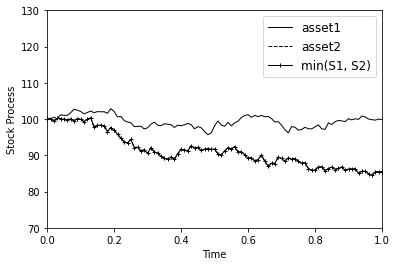

In [10]:
stock_process_with_correllation2(x_vol=0.079, y_vol=0.105, r=0.021, N=100, T=1, S1_0=100, S2_0=100, rho=0.3)

<a id="mc6"></a>
### 2-asset ELS
[Back to Section Top](#mc)<br>
무위험 이자율이 2.1%, 자산1 변동성은 7.9%, 자산2 변동성은 10.5%, 상관계수 0.3, 현재시점의 주가가 100인 경우 95-95-95-90-90-85 연4.4% 1-asset ELS를 시뮬레이션 하라

|조기 행사 만기|조기 행사가|쿠폰 이자율|상환금액|
|:------------:|:--------:|:---------:|:-----:|
|2022년 5월 27일|최초기준가격의 95%|2.2%|액면금액 x 102.2%|
|2022년 11월 27일|최초기준가격의 95%|4.4%|액면금액 x 104.4%|
|2023년 5월 27일|최초기준가격의 95%|2.2%|액면금액 x 106.6%|
|2023년 11월 27일|최초기준가격의 90%|4.4%|액면금액 x 108.8%|
|2024년 5월 27일|최초기준가격의 90%|2.2%|액면금액 x 111%|
|2024년 11월 27일|최초기준가격의 85%|4.4%|액면금액 x 113.2%|

In [11]:
# ELS_MC_2D
import numpy as np
from datetime import date
n = 1000; r = 0.021
x_vol = 0.079; y_vol = 0.105
n0 = date.toordinal(date(2022, 5, 27))
n1 = date.toordinal(date(2022, 11, 27))
n2 = date.toordinal(date(2023, 5, 27))
n3 = date.toordinal(date(2023, 11, 27))
n4 = date.toordinal(date(2024, 5, 27))
n5 = date.toordinal(date(2024, 11, 27))
n6 = date.toordinal(date(2025, 5, 27))
check_day = np.array([n1-n0, n2-n0, n3-n0, n3-n0, n5-n0, n6-n0])
rho = 0.3; corr = np.array([[1, rho], [rho, 1]])
coupon_rate = ([0.022, 0.044, 0.066, 0.088, 0.11, 0.132])
oneyear = 365; tot_date = n6 - n0; dt = 1 / oneyear
k = np.linalg.cholesky(corr)
S1 = np.zeros((tot_date + 1, 1))
S2 = np.zeros((tot_date + 1, 1))
S1[0] = 100; S2[0] = 100
ratio_S1 = S1[0]; ratio_S2 = S2[0]
strike_price = ([0.95, 0.95, 0.95, 0.90, 0.90, 0.85])
repay_n = len(strike_price)
payment = np.zeros([repay_n, 1])
payoff = np.zeros([repay_n, 1])
tot_payoff = np.zeros([repay_n, 1])
discount_payoff = np.zeros([repay_n, 1])
face_value = 10**4; dummy=0.15; kib = 0.50
for j in range(repay_n):
    payment[j] = face_value * (1 + coupon_rate[j])
for i in range(n):
    w0 = np.random.normal(0, 1, size=[tot_date, 2])
    w0 = np.transpose(w0)
    w = np.matmul(k, w0)
    for j in range(tot_date):
        S1[j + 1] = S1[j] * np.exp((r - 0.5 * x_vol ** 2) * dt + x_vol * np.sqrt(dt) * w[0,j])
        S2[j + 1] = S2[j] * np.exp((r - 0.5 * y_vol ** 2) * dt + y_vol * np.sqrt(dt) * w[1,j])
        R1 = S1 / ratio_S1; R2 = S2 / ratio_S2
        WP = np.minimum(R1, R2)
        WP_checkday = WP[check_day]
        payoff = np.zeros([repay_n, 1]); repay_event = 0
        for j in range(repay_n):
            if WP_checkday[j] >= strike_price[j]:
                    payoff[j] = payment[j]
                    repay_event = 1
                    break
        if repay_event == 0:
            if min(WP) > kib:
                payoff[-1] = face_value * (1 + dummy)
            else:
                payoff[-1] = face_value * WP[-1]
    tot_payoff = tot_payoff + payoff
mean_payoff = tot_payoff / n
for j in range(repay_n):
    discount_payoff[j] = mean_payoff[j] * np.exp(-r * check_day[j] / oneyear)

price = np.sum(discount_payoff)
print(price)

10224.920080492895


In [12]:
# ELS_MC_2D 코드설명
import numpy as np
from datetime import date
# 시뮬레이션 횟수
n = 1000
# 이자율
r = 0.0165
# 기초자산1의 변동성
x_vol = 0.249
# 기초자산2의 변동성
y_vol = 0.2182
# 최초 기준 가격평가일
n0 = date.toordinal(date(2022, 5, 27))
# 1차 조기 상환일
n1 = date.toordinal(date(2022, 11, 27))
# 2차 조기 상환일
n2 = date.toordinal(date(2023, 5, 27))
# 3차 조기 상환일
n3 = date.toordinal(date(2023, 11, 27))
# 4차 조기 상환일
n4 = date.toordinal(date(2024, 5, 27))
# 5차 조기 상환일
n5 = date.toordinal(date(2024, 11, 27))
# 만기 상환일
n6 = date.toordinal(date(2025, 5, 27))
# 조기 상환일 벡터
check_day = np.array([n1-n0, n2-n0, n3-n0, n3-n0, n5-n0, n6-n0])
# 두 기초자산의 상관계수
rho = 0.0981
# 촐레스키 분해를 사용하기 위한 상관계수 행렬
corr = np.array([[1, rho], [rho, 1]])
# chol 함수를 이용하여 촐레스키 분해
k = np.linalg.cholesky(corr)
# 1년의 일수
oneyear = 365
# 만기
tot_date = n6 - n0
# 시간 격자 간격
dt = 1 / oneyear
# 기초자산1 벡터 생성
S1 = np.zeros((tot_date + 1, 1))
# 기초자산2 벡터 생성
S2 = np.zeros((tot_date + 1, 1))
# 기초자산1의 초깃값
S1[0] = 100
# 기초자산2의 초깃값
S2[0] = 100
# [만기평가가격/최초기준가격]의 비율 결정하기 위해 기초자산의 초깃값 저장
ratio_S1 = S1[0]; ratio_S2 = S2[0]
# 조기행사가격 벡터
strike_price = ([0.95, 0.95, 0.95, 0.90, 0.90, 0.85])
# 조기행사시 받는 쿠폰 이자율
coupon_rate = ([0.022, 0.044, 0.066, 0.088, 0.11, 0.132])
# 조기 상환 횟수
repay_n = len(strike_price)
# 조기 상환시 페이오프 벡터
payment = np.zeros([repay_n, 1])
# 페이오프 벡터
payoff = np.zeros([repay_n, 1])
# 전체 페이오프 벡터
tot_payoff = np.zeros([repay_n, 1])
# 현가 할인 된 페이오프 벡터
discount_payoff = np.zeros([repay_n, 1])
# 액면 금액
face_value = 10**4
# 더미 이자율
dummy=0.15
# 낙인 배리어
kib = 0.50
# 조기상환 했을 떄의 페이오프 벡터 생성
for j in range(repay_n):
    payment[j] = face_value * (1 + coupon_rate[j])
# 몬테카를로 시뮬레이션을 이용한 ELS 가격 결정
for i in range(n):
    # 촐레스키 분해된 행렬 k를 이용하여 상관관계가 있는 난수 생성
    w0 = np.random.normal(0, 1, size=[tot_date, 2])
    # 난수 행렬을 전치시켜줌.
    w0 = np.transpose(w0)
    # 난수 행렬과 촐레스키 분해된 행렬을 행렬곱
    w = np.matmul(k, w0)
    for j in range(tot_date):
        # GBM 오일러 이산화
        S1[j + 1] = S1[j] * np.exp((r - 0.5 * x_vol ** 2) * dt + x_vol * np.sqrt(dt) * w[0,j])
        S2[j + 1] = S2[j] * np.exp((r - 0.5 * y_vol ** 2) * dt + y_vol * np.sqrt(dt) * w[1,j])
        # [만기평가가격/최초기준가격]의 기준 비율이 더 낮은 가격을 갖는 기초자산 결정
        R1 = S1 / ratio_S1; R2 = S2 / ratio_S2
        WP = np.minimum(R1, R2)
        # 조기상환일 체크하여 페이오프 결정
        WP_checkday = WP[check_day]
        payoff = np.zeros([repay_n, 1])
        # 조기상환이 되지 않은 상태를 의미함
        repay_event = 0
        for j in range(repay_n):
            if WP_checkday[j] >= strike_price[j]:
                    payoff[j] = payment[j]
                    # 조기상환이 된 상태를 의미함. for 문을 빠져나옴
                    repay_event = 1
                    break
        # 조기상환 되지 않고 만기까지 온 경우
        if repay_event == 0:
            if min(WP) > kib:
                # 낙인 배리어 아래로 내려간 적이 없는 경우
                payoff[-1] = face_value * (1 + dummy)
            else:
                # 낙인 배리어 아래로 내려간 적이 있는 경우
                payoff[-1] = face_value * WP[-1]
    # 시뮬레이션마다 페이오프를 더함
    tot_payoff = tot_payoff + payoff
# 모든 시뮬레이션의 페이오프의 평균을 구함
mean_payoff = tot_payoff / n
# 페이오프를 무위험 이자율로 할인하여 현재 가격을 구함
for j in range(repay_n):
    discount_payoff[j] = mean_payoff[j] * np.exp(-r * check_day[j] / oneyear)
# ELS 가격을 구함
price = np.sum(discount_payoff)
print(price)

9656.67510890177


<a id="fdm"></a>
## 유한차분법 (Finite Difference Method)
1. [토마스 알고리즘](#fdm1)
1. [1-D 균일격자 블랙-숄즈 방정식](#fdm2)

<a id="fdm1"></a>
### 토마스 알고리즘
[Back to Section Top](#mc)<br>
토마스 알고리즘을 구현하여라

In [13]:
import numpy as np

def thomas(alpha, beta, gamma, f):
    n = len(f)
    v = np.zeros(n)
    [aa, dd, cc, bb] = map(np.array, [alpha, beta, gamma, f])
    for i in range(1, n):
        mult = aa[i] / dd[i - 1]
        dd[i] = dd[i] - mult * cc[i - 1]
        bb[i] = bb[i] - mult * bb[i - 1]
    v[n - 1] = bb[n - 1] / dd[n - 1]
    for i in range(n - 2, -1, -1):
        v[i] = (bb[i] - cc[i] * v[i + 1]) / dd[i]
    return v

<a id="fdm2"></a>
### 1-D 균일격자 블랙-숄즈 방정식
[Back to Section Top](#mc)<br>
균일 격자에서의 함축적 방법을 이용하여 1-D 블랙-숄즈 방정식을 풀어라

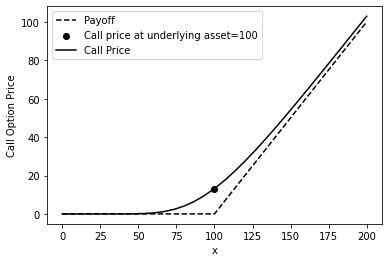

Price=13.207513


In [14]:
# BS_implicit_1D
import numpy as np
import matplotlib.pyplot as plt
K = 100; R=200; volatility = 0.3; r = 0.03; T = 1
Nx = 31; Nt = 360; dt = T / Nt
x = np.linspace(0, R, Nx)
h = x[1] - x[0]
u = np.zeros([Nx, Nt + 1])
for i in range(0, Nx):
    u[i, 0] = np.maximum(x[i]-K, 0)
plt.plot(x, u[:,0], 'k--', label='Payoff')
[a, d, c, b] = map(np.zeros, [Nx, Nx, Nx, Nx])
for i in range(0, Nx):
    a[i] = r * x[i] / (2 * h) - (volatility * x[i]) ** 2 / (2 * h ** 2)
    d[i] = (1/dt)+((volatility*x[i])) ** 2 / (h ** 2) + r
    c[i] = -r * x[i] / (2 * h) - (volatility * x[i]) ** 2 / (2 * h ** 2)
d[Nx - 1] = d[Nx - 1] + 2 * c[Nx - 1]
a[Nx - 1] = a[Nx - 1] - c[Nx - 1]
for n in range(0, Nt):
    b = u[:, n] / dt
    u[:, n + 1] = thomas(a, d, c, b)
ii = np.where(x==100)
plt.scatter(x[ii], u[ii, Nt], color='k', label='Call price at underlying asset=100')
plt.plot(x, u[:,Nt], 'k-', label='Call Price')
plt.xlabel("x", fontsize=10)
plt.ylabel("Call Option Price", fontsize=10)
plt.legend(loc='upper left')
plt.show()
print('Price=%f'%(u[ii,Nt]))

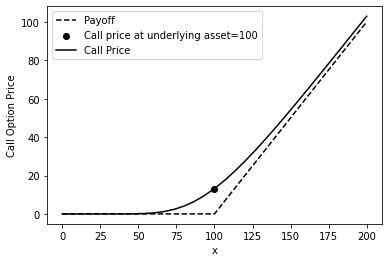

Price=13.207513


In [15]:
# BS_implicit_1D_코드설명
import numpy as np
import matplotlib.pyplot as plt
K = 100 # 행사가격
R = 200 #도메인의 최댓값
volatility = 0.3 # 변동성
r = 0.03 # 무위험 이자율
T = 1 # 만기
Nx = 31 # x 격자 갯수
Nt = 360 # 시간 격자 갯수
dt = T / Nt # 시간 격자 간격
x = np.linspace(0, R, Nx) # 기초자산
h = x[1] - x[0] # x 격자 간격
# 초깃값을 위해 만드는 0으로만 이루어진 행렬
u = np.zeros([Nx, Nt + 1])
# 초깃값
for i in range(0, Nx):
    u[i, 0] = np.maximum(x[i] - K, 0)
# 페이오프 그리기
plt.plot(x, u[:,0], 'k--', label='Payoff')
[a, d, c, b] = map(np.zeros, [Nx, Nx, Nx, Nx])
# 유한차분법을 사용하기 위한 계수. 식 (3.11)과 같음.
for i in range(0, Nx):
    a[i] = r * x[i] / (2 * h) - (volatility * x[i]) ** 2 / (2 * h ** 2)
    d[i] = (1/dt)+((volatility*x[i])) ** 2 / (h ** 2) + r
    c[i] = -r * x[i] / (2 * h) - (volatility * x[i]) ** 2 / (2 * h ** 2)
# 선형 경계조건. 식 (3.12)에서 확인 가능
d[Nx - 1] = d[Nx - 1] + 2 * c[Nx - 1]
a[Nx - 1] = a[Nx - 1] - c[Nx - 1]
# 유한차분법과 토마스 알고리즘을 이용해 옵션 가격 계산
for n in range(0, Nt):
    b = u[:, n] / dt
    u[:, n + 1] = thomas(a, d, c, b)
# np.where 함수를 이용하여 x의 인덱스 찾기
ii = np.where(x==100)
# 기초자산가격이 100일 경우 콜옵션 가격 그리기
plt.scatter(x[ii], u[ii, Nt], color='k', label='Call price at underlying asset=100')
# 옵션 가격 그래프 그리기
plt.plot(x, u[:,Nt], 'k-', label='Call Price')
plt.xlabel("x", fontsize=10)
plt.ylabel("Call Option Price", fontsize=10)
plt.legend(loc='upper left')
plt.show()
# 기초자산가격이 100일 경우 콜옵션 가격 출력
print('Price=%f'%(u[ii,Nt]))